# <font color = #4854E8> Clustering </font>

Cluster analysis or clustering is an unsupervised machine learning algorithm that groups unlabeled datasets. It aims to form clusters or groups using the data points in a dataset in such a way that there is high intra-cluster similarity and low inter-cluster similarity. In, layman terms clustering aims at forming subsets or groups within a dataset consisting of data points which are really similar to each other and the groups or subsets or clusters formed can be significantly differentiated from each other.

### Different types of Clustering Algorithms

1) Centroid-based Clustering, 2) Hierarchical-Based Clustering, 3) Density-based Clustering, and 4) Distribution-based Clustering


#### Centroid-based Clustering

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering1.png" width="350"/>
</div>

Centroid-based clustering organizes the data into non-hierarchical clusters, in contrast to hierarchical clustering defined below. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. Using this aproach, we classify a given data set through a certain number of predetermined clusters or “k” clusters.

**algorithms**: k-Means, k-Means++, k-Means||, c-Means, k-Medoids, k-medians, etc

#### Hierarchical-Based Clustering

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering4.png" width="500"/>
</div>

Hierarchical clustering creates a tree of clusters. Hierarchical clustering, not surprisingly, is well suited to hierarchical data, such as taxonomies. In addition, another advantage is that any number of clusters can be chosen by cutting the tree at the right level. We have two follows approaches Divisive and Agglomerative. Agglomerative considers each observation as a single cluster then grouping similar data points until fused into a single cluster and Divisive works just opposite to it.

**algorithms**: Agglomerative and Divisive Hierarchical clustering 

#### Density-based Clustering

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering2.png" width="400"/>
</div>

Density-Based Clustering refers to one of the most popular unsupervised learning methodologies used in model building and machine learning algorithms. Density-based clustering connects areas of high example density into clusters. This allows for arbitrary-shaped distributions as long as dense areas can be connected. These algorithms have difficulty with data of varying densities and high dimensions. Further, by design, these algorithms do not assign outliers to clusters.

**algorithms**: DBSCAN (Density-Based Spatial Clustering of Applications with Noise), Adaptive DBSCAN, TI-DBSCAN, OPTICS (Ordering Points To Identify Clustering Structure), etc

#### Distribution-based Clustering

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/clustering3.png" width="400"/>
</div>

This clustering approach assumes data is composed of distributions, such as Gaussian distributions. In Figure, the distribution-based algorithm clusters data into three Gaussian distributions. As distance from the distribution's center increases, the probability that a point belongs to the distribution decreases. The bands show that decrease in probability. When you do not know the type of distribution in your data, you should use a different algorithm.

Distribution-based clustering creates and groups data points based on their likelihood of belonging to the same probability distribution (Gaussian, Binomial, etc.) in the data. It is a probability-based distribution that uses statistical distributions to cluster the data objects. The cluster includes data objects that have a higher probability to be in it.

**algorithms**: GMM (Gaussian Mixture model), EM (Expectation-Maximization in the context of clustering), DMM (Dirichlet Mixtures Models), etc

Now here in this demonstration, we will be deeply focusing on the k-means Clustering algorithm, explanations of working of k-means, advantages and disadvantages, and a solved practical clustering problem that will enhance the understandings and give you a proper view of how k-means clustering works.

# <font color = #4854E8> How does the K-Means Algorithm Work? </font>

The working of the K-Means algorithm is explained in the below steps:

- Step-1: Select the number K to decide the number of clusters.
- Step-2: Select random K points or centroids. (It can be other from the input dataset).
- Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.
- Step-4: Calculate the centroids and place a new centroid of each cluster.
- Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.
- Step-6: If no any datapoint changes, then FINISH.
- Step-7: The model is ready.

### Advantages of using k-means clustering
- Easy to implement.
- With a large number of variables, K-Means may be computationally faster than hierarchical clustering (if K is small).
- Use k-Means when clusters are linearly separable.

### Disadvantages of using k-means clustering
- Choosing manually. Difficult to predict the number of clusters (K-Value)
- Being dependent on initial values
- Clustering outliers. Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering
- Scaling with number of dimensions

# <font color = #4854E8> How to Perform K-Means Clustering in Python </font>

In this section, you’ll take a step-by-step tour of the conventional version of the k-means algorithm. Understanding the details of the algorithm is a fundamental step in the process of writing your k-means clustering pipeline in Python. What you learn in this section will help you decide if k-means is the right choice to solve your clustering problem.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

You can generate the data using make_blobs(), a convenience function in scikit-learn used to generate synthetic clusters. make_blobs() uses these parameters:
- n_samples is the total number of samples to generate.
- centers is the number of centers to generate.
- cluster_std is the standard deviation.

make_blobs() returns a tuple of two values:
- A two-dimensional NumPy array with the features for each of the samples
- A one-dimensional NumPy array containing the cluster labels for each sample

Text(0, 0.5, 'X2')

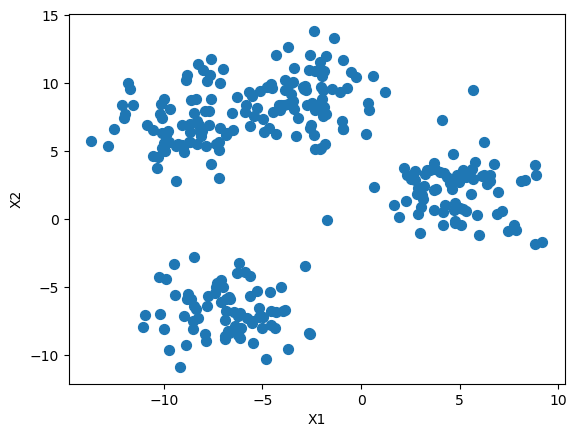

In [5]:
X, y_true = make_blobs(
                    n_samples=300,
                    centers=4,
                    cluster_std=1.96,
                    random_state=42
                    )
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('X1')
plt.ylabel('X2')

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

Text(0, 0.5, 'X2')

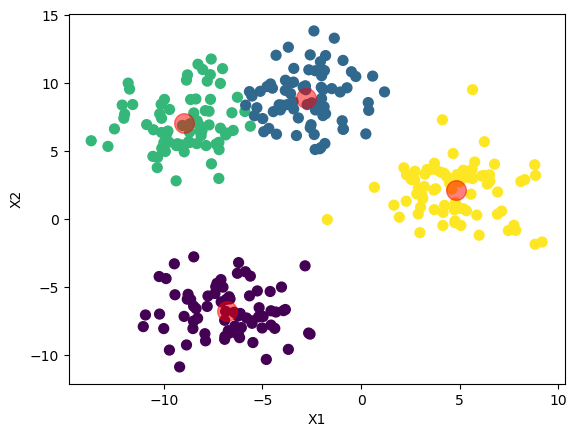

In [8]:
# plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# plot the center of clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.xlabel('X1')
plt.ylabel('X2')

## The Real Dataset:

This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa, Iris Versicolour, and Iris Virginica

In [9]:
import pandas as pd
mydata = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                        names=['sepal length','sepal width','petal length','petal width','class'])

In [10]:
mydata

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Text(0, 0.5, 'petal width')

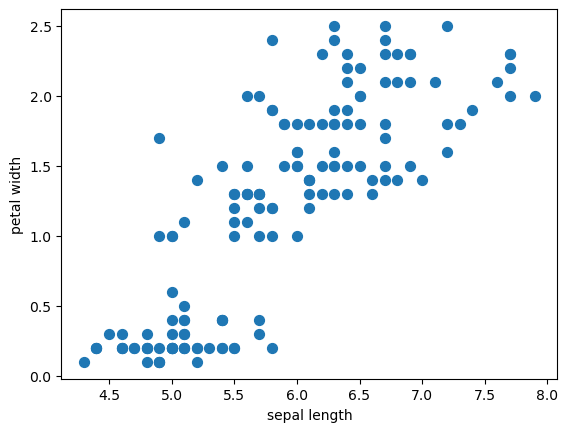

In [11]:
# plot 2d features 'sepal length' and 'petal width'
plt.scatter(mydata['sepal length'], mydata['petal width'], s=50);
plt.xlabel('sepal length')
plt.ylabel('petal width')

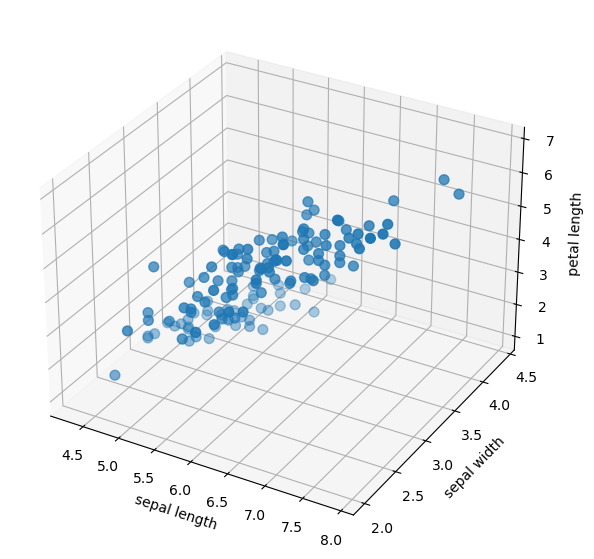

In [12]:
# plot 3d features 'sepal length', 'sepal width' and 'petal width'
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(projection='3d')
ax.scatter3D(mydata['sepal length'], mydata['sepal width'], mydata['petal length'], s=50, cmap='autumn')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.show()

In [14]:
# k-means clustering of iris dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(mydata.iloc[:,:-1])
y_kmeans = kmeans.predict(mydata.iloc[:,:-1])

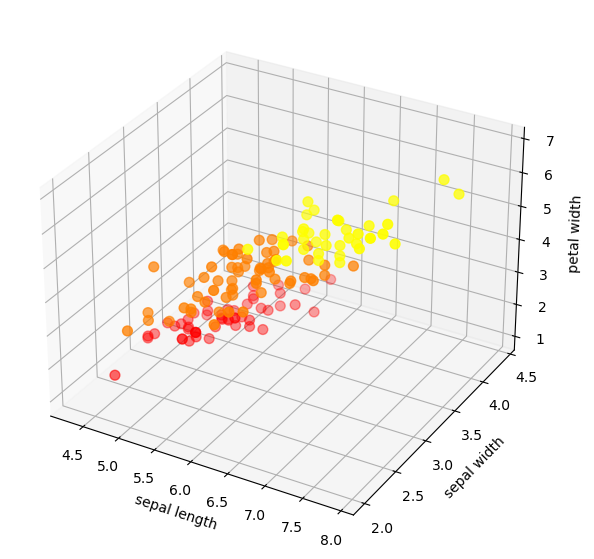

In [15]:
# plot clusters
fig = plt.figure(figsize=(9,7))
ax = plt.subplot(projection='3d')
ax.scatter3D(mydata['sepal length'], mydata['sepal width'], mydata['petal length'], c=y_kmeans, s=50, cmap='autumn')
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal width')
plt.show()

# <font color = #4854E8> Finding optimum number of clusters (k) </font>

Contrary to supervised learning where we have the ground truth to evaluate the model’s performance, clustering analysis doesn’t have a solid evaluation metric that we can use to evaluate the outcome of different clustering algorithms. Moreover, since kmeans requires k as an input and doesn’t learn it from data, there is no right answer in terms of the number of clusters that we should have in any problem. Sometimes domain knowledge and intuition may help but usually that is not the case. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling.

In this demontration, we’ll cover two metrics that may give us some intuition about k:
- Elbow method
- Silhouette analysis

### Elbow Method

**Elbow** method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the iris dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

Text(0, 0.5, 'Sum of squared distance')

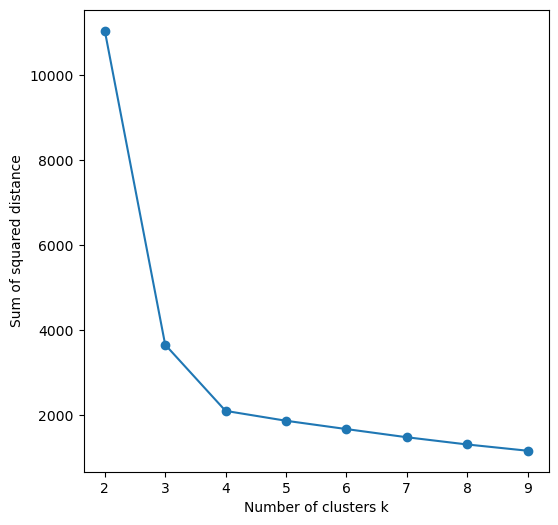

In [18]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

The graph above shows that k=4 is the right one, and also k=3 is not a bad choice. 

Sometimes it’s still hard to figure out a good number of clusters to use because the curve is monotonically decreasing and may not show any elbow or has an obvious point where the curve starts flattening out.

### Silhouette coefficient

The silhouette coefficient is can be used to determine the degree of separation between clusters. For each sample. It quantifies how well a data point fits into its assigned cluster based on two factors:
- How close the data point is to other points in the cluster
- How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters. Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters. 

For each sample:
- Compute the average distance from all data points in the same cluster (ai).
- Compute the average distance from all data points in the closest cluster (bi).
- Compute the coefficient:

<div>
<img src="https://raw.githubusercontent.com/rauzansumara/introduction-to-machine-learning/master/Images/silhoute.png" width="300"/>
</div>

In [21]:
# call function
from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

Plotting the average silhouette scores for each k shows that the best choice for k is 3, and 4 since it has the maximum score:

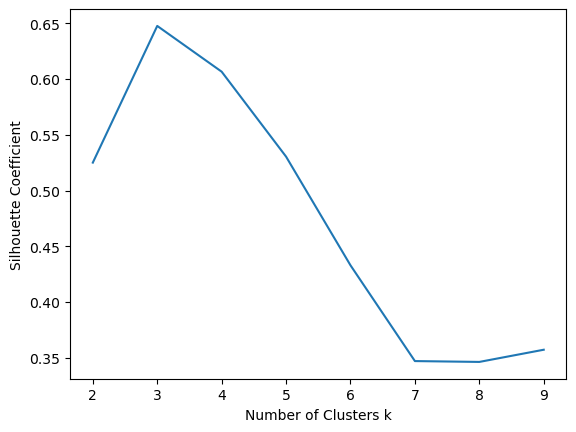

In [23]:
# silhouette_coefficients plot
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters k")
plt.ylabel("Silhouette Coefficient")
plt.show()

# <font color = #4854E8> k-means is limited to linear cluster boundaries </font>

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

In [24]:
# create syntetic dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

Text(0, 0.5, 'X2')

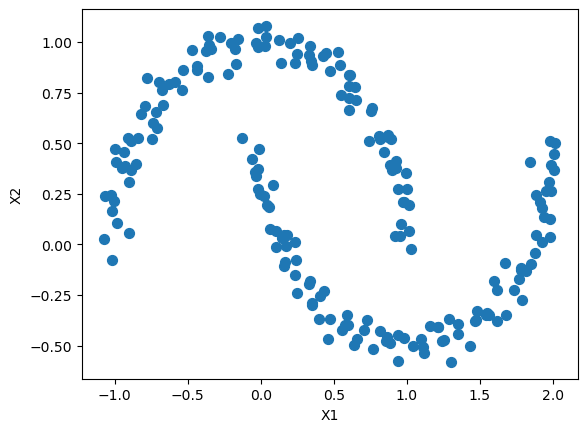

In [25]:
# plot data
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.xlabel('X1')
plt.ylabel('X2')

Text(0, 0.5, 'X2')

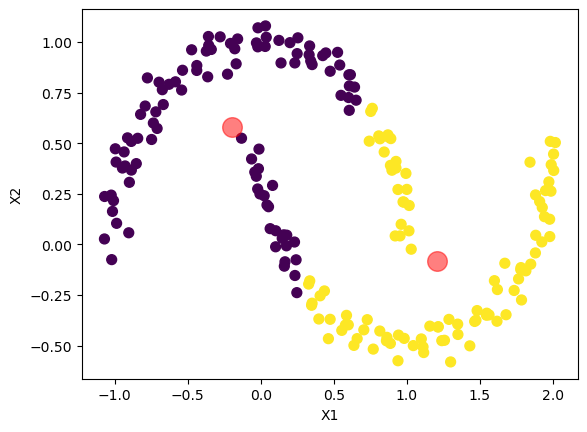

In [26]:
# k-means estimation
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# plot cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.xlabel('X1')
plt.ylabel('X2')

This situation, we cannot use k-means clustering to solve it. We may use a kernel transformation to project the data into a higher dimension where a linear separation is possible. We might imagine using the same trick to allow k-means to discover non-linear boundaries. 

One version of this kernelized k-means is implemented in Scikit-Learn within the **Spectral Clustering** estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm. The other can be used also like **DBSCAN**, **TI-DBSCAN**, etc